<a href="https://colab.research.google.com/github/ed-chin-git/DS-Unit-2-Sprint-2-Linear-Regression/blob/master/U2S2D1_ASSIGNMENT_Linear_Regression_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Refernece Material

Lecture [Video](https://www.youtube.com/watch?v=V_4D0VGH-xY&feature=youtu.be)

Lecture [notebook](https://colab.research.google.com/drive/1B8wWKkze02O1Bnc17MD-OOV8Nqe704eb)

Statistics 101: [Linear Regression](https://www.youtube.com/watch?v=iAgYLRy7e20&list=PLIeGtxpvyG-LoKUpV0fSY8BGKIMIdmfCi&index=2)

Statistics 101: [Multiple regression](https://www.youtube.com/watch?v=dQNpSa-bq4M)


# King County Housing Data - Linear Regression Assignment

Data for this assignment was obtained from Kaggle: <https://www.kaggle.com/harlfoxem/housesalesprediction>

Complete the following challenges below to improve iteratively your home price estimation and practice implementing predictive linear regression models. 

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score



# Bivariate Regression

Pick the X variable that you think will be the most correlated with Y. 

Split your dataset into a 50-50 test-train-split (50% of data for training, and 50% for testing).

Train a regression model using this single X and single Y variable. Once you have trained the model and obtained its coefficients, plot the points on a graph and fit your line of best fit to the graph.

Report your Root Mean Squared Error and R-Squared for this model.



In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/kc_house_data.csv')
pd.set_option('display.max_columns', 100)
print(df.shape)
df.head()

(21613, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


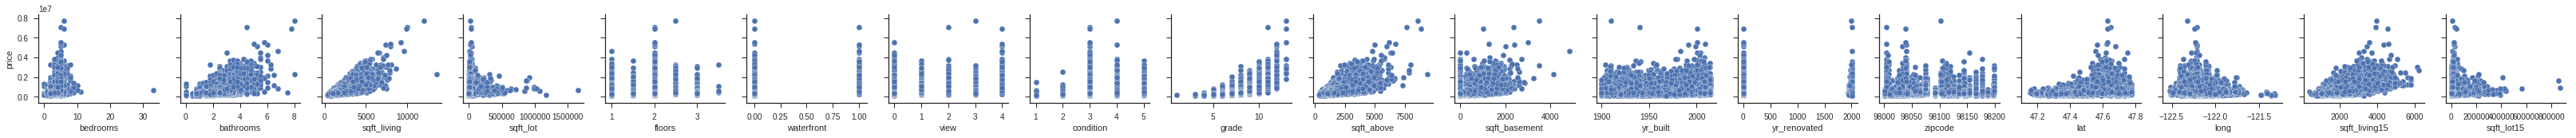

In [0]:
sns.set(style='ticks', color_codes=True)
depend_vars = df.columns.drop(['price','id','date'])
sns.pairplot(data=df,
                  y_vars=['price'],
                  x_vars=depend_vars);

In [0]:
y = df.loc[:, ['price']].values
X = df.loc[:, ['sqft_living']].values

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=.5, random_state=42)

print(X.shape, "\n")
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

#X_train=X_train.reshape(-1,1)
#X_test=X_test.reshape(-1,1)
#Y_train=Y_train.reshape(-1,1)
#Y_test=Y_test.reshape(-1,1)

print('\n')
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

#X_train

(21613, 1) 

(10806, 1)
(10807, 1)
(10806, 1)
(10807, 1)


(10806, 1)
(10807, 1)
(10806, 1)
(10807, 1)


In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
model = LinearRegression()

model.fit(X_train, Y_train)

y_test_predict = model.predict(X_test)
MSE = mean_squared_error(Y_test, y_test_predict)
RMSE = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
R2 = r2_score(Y_test, y_test_predict)

print("Slope Coefficient: \n", model.coef_)
print("\n Intercept Vlaue: ", model.intercept_)

Slope Coefficient: 
 [[268.42931803]]

 Intercept Vlaue:  [-20631.15655449]


In [0]:

print('MSE is {}'.format(MSE))
print('RMSE is {}'.format(RMSE))

print('R^2 is {}'.format(R2))

MSE is 75628624138.70985
RMSE is 275006.58926416625
R^2 is 0.49226256935760826


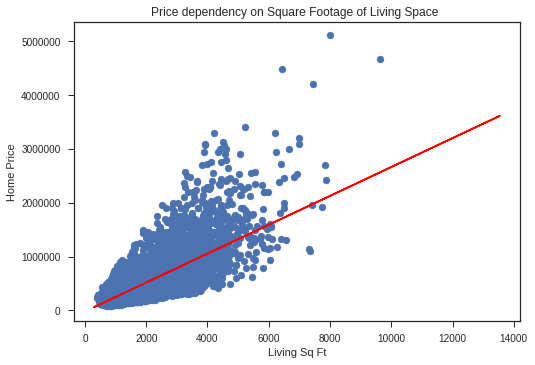

In [0]:
plt.scatter(X_train,Y_train)

m_hat = model.coef_[0]
b_hat = model.intercept_
y_hat = [m_hat*x + b_hat for x in X_test]
plt.plot(X_test, y_hat,color = 'red');

plt.xlabel("Living Sq Ft")
plt.ylabel("Home Price")
plt.title("Price dependency on Square Footage of Living Space ");

# Two-variable Multiple Regression

To ramp up slowly, pick a second X variable that you think will be the most correlated with Y. 

Split your dataset into a 50-50 test-train-split (50% of data for training, and 50% for testing).

Train a regression model using these two X variables. Once you have trained the model and obtained its coefficients, plot the points on a graph and fit your **plane** of best fit to the graph.

Report your Root Mean Squared Error and R-squared for this model.

In [0]:
y = df.loc[:,["price"]].values
X = df.loc[:, ['bedrooms','sqft_living']].values
print (X)
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=.5, random_state=42)

#X_train = X_train.reshape(-1,1)
#Y_train = Y_train.reshape(-1,1)
#X_test = X_test.reshape(-1,1)
#Y_test = Y_test.reshape(-1,1)
#X = X.reshape(-1,1)
#y = y.reshape(-1,1)
print(X.shape, "\n")

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

X

[[   3 1180]
 [   3 2570]
 [   2  770]
 ...
 [   2 1020]
 [   3 1600]
 [   2 1020]]
(21613, 2) 

(10806, 2)
(10807, 2)
(10806, 1)
(10807, 1)


array([[   3, 1180],
       [   3, 2570],
       [   2,  770],
       ...,
       [   2, 1020],
       [   3, 1600],
       [   2, 1020]])

In [0]:
model = LinearRegression()
model.fit(X_train,Y_train)
beta_0 = model.intercept_
beta_i = model.coef_[0]

print("Slope Coefficients: ", beta_i)
print("\nIntercept Value: ", beta_0)



Slope Coefficients:  [-61633.19206584    304.72984939]

Intercept Value:  [111190.51860876]


In [0]:
y_test_predict = model.predict(X_test)
MSE = mean_squared_error(Y_test, y_test_predict)
RMSE = (np.sqrt(MSE))
R2 = r2_score(Y_test, y_test_predict)

print("MSE is {}".format(MSE))
print('RMSE is {}'.format(RMSE))
print('R^2 is {}'.format(R2))

MSE is 73857406595.95148
RMSE is 271767.19190504117
R^2 is 0.5041537475260679


[[-1.65 34.65]
 [-1.65 34.65]]


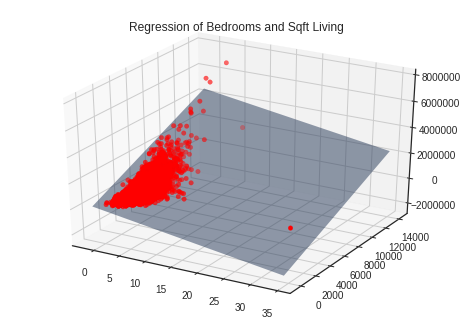

In [0]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

ax.scatter(df['bedrooms'],df['sqft_living'], df['price'], c = 'red')

x1 = np.array(ax.get_xlim())
y1 = np.array(ax.get_ylim())
xx, yy = np.meshgrid(x1,y1)
zz = beta_i[0]*xx + beta_i[1]*yy + beta_0[0]

plt3d = plt.gca(projection = '3d')

plt3d.plot_surface(xx,yy,zz,alpha=0.5);

plt.title("Regression of Bedrooms and Sqft Living");

print(xx)


# Multiple Regression

Now using all available X variables, split your data into test and training datasets, train your model, obtain its coefficients, and report the Root Mean Squared Error and R-squared values.

In [0]:
y = df['price']
X = df.drop('price', axis=1)
X = X.drop('date', axis=1)
X = X.drop('id', axis=1)
X = X.drop('zipcode', axis=1)
X = X.drop('lat', axis=1)
X = X.drop('long', axis=1)


X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = .5, random_state = 42)

print(X.shape, "\n")

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(21613, 15) 

(10806, 15)
(10807, 15)
(10806,)
(10807,)


In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()
model.fit(X_train,Y_train)

print("Coefficient: \n",model.coef_)
print("\n Intercept: ",model.intercept_)

Coefficient: 
 [-4.01060016e+04  4.44775932e+04  1.00419914e+02 -2.95786477e-02
  3.18485854e+04  5.68750522e+05  4.25914661e+04  1.70740771e+04
  1.21906330e+05  4.24169748e+01  5.80029399e+01 -3.45232894e+03
  1.05517173e+01  2.93851295e+01 -5.49723876e-01]

 Intercept:  5977237.319878921


In [0]:
y_test_predict = model.predict(X_test)

MSE = mean_squared_error(Y_test, y_test_predict)
RMSE = np.sqrt(MSE)
R2 = r2_score(Y_test, y_test_predict)

print("MSE is {}".format(MSE))
print('RMSE is {}'.format(RMSE))
print('R^2 is {}'.format(R2))

MSE is 53064494262.60505
RMSE is 230357.31866516647
R^2 is 0.643748246354219


# Stretch Goals

Pick from these stretch goals the tasks that you feel like will be the most beneficial for you. 

- Explore the concept of $R^2$, learn how it is calculated and how it relates to covariance, correlation, and variance. 
- Start to research Polynomial Regression and Log-Linear Regression (tomorrow's topics). Find a new regression dataset and try to implement one of these models. 
- Research "Feature Engineering" see what features you can engineer on the above dataset. How much are you able to improve your accuracy with feature engineering?
- Further explore the concept of "Model Validation" - we'll spend a whole week on this soon. What other measures of model accuracy could we have used besides Root Mean Squared Error?
- Write a blog post explaining the basics of Linear Regression.

Remember to share your findings in the slack channel. :)


## For tomorrow’s _*WALKIE TALKIE*_:

It’s time for another round of interview questions.
There will be a few linear algebra questions from last week’s material.
_Annnnddddd_ a few “softball” questions. *BUT* not really, because versions of these
get asked at many, many interviews. I’ll give them to you now, because it is good
to have something ready for these types of question:

• 3 linear algebra questions (to be determined)
• What is a time when you let others down in a professional setting, and what did you do to remedy it? Or, if you didn’t, what could you have done?
• What are you proudest of having accomplished and why?
• What are 3 predictions you have about the world 20 years from now?